In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

# WEEK 8 PEER PROJECT 

# Step 1: Create a DataFrame from the list of dictionaries below

In [2]:
sales_records=[
              {'product_id':23, 'name':'computer','wholesale_price':500,'retail_price':1000, 'sales':100},
              {'product_id':96, 'name':'python workout','wholesale_price':35,'retail_price':75, 'sales':500},
              {'product_id':97, 'name':'Pandas Workout', 'wholesale_price':35, 'retail_price':75, 'sales':500},
              {'product_id':15, 'name':'banana','wholesale_price':0.5,'retail_price':1,'sales':200},
              {'product_id':87, 'name':'sandwich','wholesale_price':3,'retail_price':5,'sales':300}
              ]

In [3]:
df=pd.DataFrame(sales_records)

In [4]:
df.head()

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000,100
1,96,python workout,35.0,75,500
2,97,Pandas Workout,35.0,75,500
3,15,banana,0.5,1,200
4,87,sandwich,3.0,5,300


In [5]:
df.set_index('product_id', inplace=True)

In [6]:
df

,name,wholesale_price,retail_price,sales
product_id,,,,
23,computer,500.0,1000,100
96,python workout,35.0,75,500
97,Pandas Workout,35.0,75,500
15,banana,0.5,1,200
87,sandwich,3.0,5,300


# Step 2: Calculate the Total Profit for each product using the formular
# net_revenue_per_product=(retail_price -wholesale price) * sales

In [7]:
df['net_revenue_per_product'] = (df['retail_price'] - df['wholesale_price']) * df['sales']

In [8]:
df

,name,wholesale_price,retail_price,sales,net_revenue_per_product
product_id,,,,,
23,computer,500.0,1000,100,50000.0
96,python workout,35.0,75,500,20000.0
97,Pandas Workout,35.0,75,500,20000.0
15,banana,0.5,1,200,100.0
87,sandwich,3.0,5,300,600.0


In [9]:
df['net_revenue_per_product']

product_id
23    50000.0
96    20000.0
97    20000.0
15      100.0
87      600.0
Name: net_revenue_per_product, dtype: float64

# Step 3: Determine the following 

# How much total net revenue you received from all of these sales

In [10]:
df['net_revenue_per_product'].sum()

90700.0

# What product is product retail price more than twice the wholesale price?

In [11]:
df['product'] = df['retail_price'] > df['wholesale_price'] * 2 

In [12]:
df

,name,wholesale_price,retail_price,sales,net_revenue_per_product,product
product_id,,,,,,
23,computer,500.0,1000,100,50000.0,False
96,python workout,35.0,75,500,20000.0,True
97,Pandas Workout,35.0,75,500,20000.0,True
15,banana,0.5,1,200,100.0,False
87,sandwich,3.0,5,300,600.0,False


# How much did the store make from food vs. computers vs. books?

## This quesiton has issues 

In [13]:
df[3:5]
# df['net_revenue_per_product'].sum()

,name,wholesale_price,retail_price,sales,net_revenue_per_product,product
product_id,,,,,,
15,banana,0.5,1,200,100.0,False
87,sandwich,3.0,5,300,600.0,False


In [14]:
food_revenue = df[3:5]['net_revenue_per_product'].sum()

In [15]:
df[1:3]

,name,wholesale_price,retail_price,sales,net_revenue_per_product,product
product_id,,,,,,
96,python workout,35.0,75,500,20000.0,True
97,Pandas Workout,35.0,75,500,20000.0,True


In [16]:
books_revenue = df[1:3]['net_revenue_per_product'].sum()

In [17]:
df[:1]

,name,wholesale_price,retail_price,sales,net_revenue_per_product,product
product_id,,,,,,
23,computer,500.0,1000,100,50000.0,False


In [18]:
computer_revenue = df[:1]['net_revenue_per_product'].sum()

In [19]:
print(f'Revenue from food: {food_revenue}')
print(f'Revenue from books: {books_revenue}')
print(f'Revenue from computer: {computer_revenue}')

Revenue from food: 700.0
Revenue from books: 40000.0
Revenue from computer: 50000.0


In [20]:
df_analysis=df[['name', 'net_revenue_per_product']]

In [21]:
df_analysis

,name,net_revenue_per_product
product_id,,
23,computer,50000.0
96,python workout,20000.0
97,Pandas Workout,20000.0
15,banana,100.0
87,sandwich,600.0


<function matplotlib.pyplot.show(close=None, block=None)>

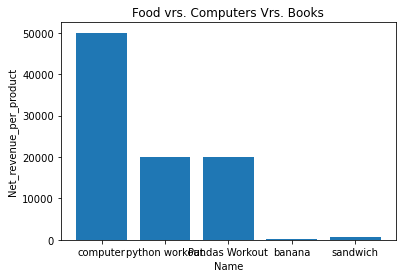

In [22]:
from matplotlib import pyplot as plt

name=df['name']
revenue=df['net_revenue_per_product']
# plt.plot(x_axis, y_axis, marker='o')

plt.bar(name, revenue)
# plt.xscale('log')
# plt.yscale('log')

plt.title('Food vrs. Computers Vrs. Books')
plt.xlabel('Name')
plt.ylabel('Net_revenue_per_product')

plt.show


# Because your store is doing so well, you're able to negotiate a 30% discount on the wholesale price of goods. Calculate the new net revenue

In [23]:
df['new_wholesale_price'] = df['wholesale_price'] * .70

In [24]:
df

,name,wholesale_price,retail_price,sales,net_revenue_per_product,product,new_wholesale_price
product_id,,,,,,,
23,computer,500.0,1000,100,50000.0,False,350.00
96,python workout,35.0,75,500,20000.0,True,24.50
97,Pandas Workout,35.0,75,500,20000.0,True,24.50
15,banana,0.5,1,200,100.0,False,0.35
87,sandwich,3.0,5,300,600.0,False,2.10


In [25]:
df['new_net_revenue'] = (df['retail_price'] - df['new_wholesale_price']) * df['sales']

In [26]:
df

,name,wholesale_price,retail_price,sales,net_revenue_per_product,product,new_wholesale_price,new_net_revenue
product_id,,,,,,,,
23,computer,500.0,1000,100,50000.0,False,350.00,65000.0
96,python workout,35.0,75,500,20000.0,True,24.50,25250.0
97,Pandas Workout,35.0,75,500,20000.0,True,24.50,25250.0
15,banana,0.5,1,200,100.0,False,0.35,130.0
87,sandwich,3.0,5,300,600.0,False,2.10,870.0


In [27]:
new_net_revenue = df['new_net_revenue'].sum()
new_net_revenue

116500.0

<function matplotlib.pyplot.show(close=None, block=None)>

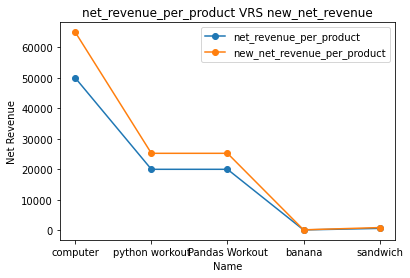

In [28]:
x_axis=df['name']
y_axis_net_revenue_per_product=df['net_revenue_per_product']

plt.plot(x_axis, y_axis_net_revenue_per_product, marker='o', label='net_revenue_per_product' )


y2_axis_new_net_revenue=df['new_net_revenue']
plt.plot(x_axis, y2_axis_new_net_revenue, marker='o', label='new_net_revenue_per_product')


plt.title('net_revenue_per_product VRS new_net_revenue')
plt.xlabel('Name')
plt.ylabel('Net Revenue')
plt.legend()


plt.show

# WEEK8 INDIVIDUAL PROJECT

# In the peer programming project, we created a data frame representing 
# our store's products and sales. In this exercise, we are going to extend that data frame, quite literally,

# The backstory for this exercise is as follows: Our local government is thinking about imposing tax, and is thinking about 15, 20, and 25 percent rates.
# Show how much less you would net with each of these tax amounts by adding columns to the data frame for current income, as well

In [29]:
sales_records=[
              {'product_id':15, 'name':'banana','wholesale_price':0.5,'retail_price':1,'sales':200, 
                'tax1':15, 'tax2':20, 'tax3':25},
              {'product_id':87, 'name':'sandwich','wholesale_price':3,'retail_price':5,'sales':300, 
               'tax1':15, 'tax2':20, 'tax3':25},
              {'product_id':96, 'name':'python workout','wholesale_price':35,'retail_price':75, 'sales':500, 
                'tax1':15, 'tax2':20, 'tax3':25}, 
              {'product_id':97, 'name':'Pandas Workout', 'wholesale_price':35, 'retail_price':75, 'sales':500, 
               'tax1':15, 'tax2':20, 'tax3':25},
              {'product_id':23,'name':'computer','wholesale_price':500,'retail_price':1000, 'sales':100, 
                'tax1':15, 'tax2':20, 'tax3':25}]

In [30]:
df=pd.DataFrame(sales_records)

In [31]:
df

,product_id,name,wholesale_price,retail_price,sales,tax1,tax2,tax3
0,15,banana,0.5,1,200,15,20,25
1,87,sandwich,3.0,5,300,15,20,25
2,96,python workout,35.0,75,500,15,20,25
3,97,Pandas Workout,35.0,75,500,15,20,25
4,23,computer,500.0,1000,100,15,20,25


In [32]:
df.set_index('product_id', inplace=True)

In [33]:
df

,name,wholesale_price,retail_price,sales,tax1,tax2,tax3
product_id,,,,,,,
15,banana,0.5,1,200,15,20,25
87,sandwich,3.0,5,300,15,20,25
96,python workout,35.0,75,500,15,20,25
97,Pandas Workout,35.0,75,500,15,20,25
23,computer,500.0,1000,100,15,20,25


In [34]:
df['net_revenue_before_tax'] = (df['retail_price'] - df['wholesale_price']) * df['sales']

In [35]:
df

,name,wholesale_price,retail_price,sales,tax1,tax2,tax3,net_revenue_before_tax
product_id,,,,,,,,
15,banana,0.5,1,200,15,20,25,100.0
87,sandwich,3.0,5,300,15,20,25,600.0
96,python workout,35.0,75,500,15,20,25,20000.0
97,Pandas Workout,35.0,75,500,15,20,25,20000.0
23,computer,500.0,1000,100,15,20,25,50000.0


# With tax1 = 15 % == 0.15

In [36]:
df['net_revenue_tax1'] = df['net_revenue_before_tax'] *.85

In [37]:
df

,name,wholesale_price,retail_price,sales,tax1,tax2,tax3,net_revenue_before_tax,net_revenue_tax1
product_id,,,,,,,,,
15,banana,0.5,1,200,15,20,25,100.0,85.0
87,sandwich,3.0,5,300,15,20,25,600.0,510.0
96,python workout,35.0,75,500,15,20,25,20000.0,17000.0
97,Pandas Workout,35.0,75,500,15,20,25,20000.0,17000.0
23,computer,500.0,1000,100,15,20,25,50000.0,42500.0


In [38]:
df['net_revenue_tax1'].sum()

77095.0

# With tax2 = 20% == 0.20

In [39]:
df['net_revenue_tax2'] = df['net_revenue_before_tax'] *.80

In [40]:
df

,name,wholesale_price,retail_price,sales,tax1,tax2,tax3,net_revenue_before_tax,net_revenue_tax1,net_revenue_tax2
product_id,,,,,,,,,,
15,banana,0.5,1,200,15,20,25,100.0,85.0,80.0
87,sandwich,3.0,5,300,15,20,25,600.0,510.0,480.0
96,python workout,35.0,75,500,15,20,25,20000.0,17000.0,16000.0
97,Pandas Workout,35.0,75,500,15,20,25,20000.0,17000.0,16000.0
23,computer,500.0,1000,100,15,20,25,50000.0,42500.0,40000.0


In [41]:
df['net_revenue_tax2'].sum()

72560.0

# With tax3 =25% == 0.25

In [42]:
df['net_revenue_tax3'] = df['net_revenue_before_tax'] *.75

In [43]:
df

,name,wholesale_price,retail_price,sales,tax1,tax2,tax3,net_revenue_before_tax,net_revenue_tax1,net_revenue_tax2,net_revenue_tax3
product_id,,,,,,,,,,,
15,banana,0.5,1,200,15,20,25,100.0,85.0,80.0,75.0
87,sandwich,3.0,5,300,15,20,25,600.0,510.0,480.0,450.0
96,python workout,35.0,75,500,15,20,25,20000.0,17000.0,16000.0,15000.0
97,Pandas Workout,35.0,75,500,15,20,25,20000.0,17000.0,16000.0,15000.0
23,computer,500.0,1000,100,15,20,25,50000.0,42500.0,40000.0,37500.0


In [44]:
df['net_revenue_tax3'].sum()

68025.0

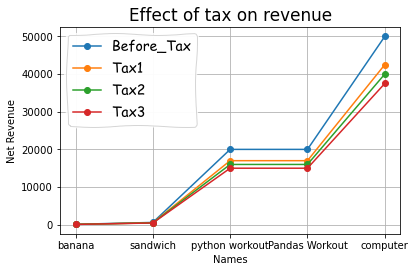

In [45]:
# x_axis=df['net_revenue_before_tax']

x_axis=df['name']
y_axis=df['net_revenue_before_tax']
# x_axis=df['name']
plt.plot(x_axis, y_axis, marker='o', label='Before_Tax')

y_axis_tax1=df['net_revenue_tax1']
plt.plot(x_axis, y_axis_tax1, marker='o', label='Tax1')

y_axis_tax2=df['net_revenue_tax2']
plt.plot(x_axis, y_axis_tax2, marker='o', label='Tax2')

y_axis_tax3=df['net_revenue_tax3']
plt.plot(x_axis, y_axis_tax3, marker='o', label='Tax3')

plt.xkcd()
plt.title('Effect of tax on revenue')
plt.legend()
plt.xlabel('Names')
plt.ylabel('Net Revenue')
# plt.style.use('seaborn-colorblind')
# plt.style.use('tableau-colorblind10')
plt.grid(True)
plt.tight_layout()


plt.show()